# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("compresive_strength_concrete.csv")

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [6]:
data.shape

(1030, 9)

In [7]:
data = data.to_numpy().astype("float32")

In [8]:
training = data[0:515]           # 50% data
testing = data[515:824]        # 30% data
validation = data[824:]          # 20% data

In [9]:
training.shape, testing.shape, validation.shape

((515, 9), (309, 9), (206, 9))

In [10]:
training_features = training[:,0:-1]
training_labels = training[:,-1]
testing_features = testing[:,0:-1]
testing_labels = testing[:,-1]
validation_features = validation[:,0:-1]
validation_labels = validation[:,-1]

In [11]:
training_features.shape

(515, 8)

In [12]:
training_labels

array([79.99, 61.89, 40.27, 41.05, 44.3 , 47.03, 43.7 , 36.45, 45.85,
       39.29, 38.07, 28.02, 43.01, 42.33, 47.81, 52.91, 39.36, 56.14,
       40.56, 42.62, 41.84, 28.24,  8.06, 44.21, 52.52, 53.3 , 41.15,
       52.12, 37.43, 38.6 , 55.26, 52.91, 41.72, 42.13, 53.69, 38.41,
       30.08, 37.72, 42.23, 36.25, 50.46, 43.7 , 39.  , 53.1 , 41.54,
       35.08, 15.05, 40.76, 26.26, 32.82, 39.78, 46.93, 33.12, 49.19,
       14.59, 14.64, 41.93,  9.13, 50.95, 33.02, 54.38, 51.73,  9.87,
       50.66, 48.7 , 55.06, 44.7 , 30.28, 40.86, 71.99, 34.4 , 28.8 ,
       33.4 , 36.3 , 29.  , 37.8 , 40.2 , 33.4 , 28.1 , 41.3 , 33.4 ,
       25.2 , 41.1 , 35.3 , 28.3 , 28.6 , 35.3 , 24.4 , 35.3 , 39.3 ,
       40.6 , 35.3 , 24.1 , 46.2 , 42.8 , 49.2 , 46.8 , 45.7 , 55.6 ,
       54.9 , 49.2 , 34.9 , 46.9 , 49.2 , 33.4 , 54.1 , 55.9 , 49.8 ,
       47.1 , 55.9 , 38.  , 55.9 , 56.1 , 59.09, 22.9 , 35.1 , 61.09,
       59.8 , 60.29, 61.8 , 56.7 , 68.3 , 66.9 , 60.29, 50.7 , 56.4 ,
       60.29, 55.5 ,

In [13]:
mean = training_features.mean(axis=0)
training_features -= mean
std = training_features.std(axis=0)
training_features /= std

testing_features -= mean
testing_features /= std

validation_features -= mean
validation_features /= std

In [14]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(training_features.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [15]:
k = 4
num_val_samples = len(training_features) // k
num_epochs = 100
all_scores = []

In [16]:
for i in range(k):
    print('processing fold #', i)
    val_data = training_features[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = training_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([training_features[:i * num_val_samples],
                                         training_features[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([training_labels[:i * num_val_samples],
                                            training_labels[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=1)
    val_mse, val_mae = model.evaluate(validation_features, validation_labels, verbose=1)
    all_scores.append(val_mae)

processing fold # 0
Epoch 1/100
387/387 [==============================] - 2s 3ms/step - loss: 1464.2472 - mae: 33.2899
Epoch 2/100
387/387 [==============================] - 1s 3ms/step - loss: 199.7711 - mae: 11.1787
Epoch 3/100
387/387 [==============================] - 1s 3ms/step - loss: 140.3039 - mae: 9.0230
Epoch 4/100
387/387 [==============================] - 1s 4ms/step - loss: 92.0379 - mae: 7.5166
Epoch 5/100
387/387 [==============================] - 1s 4ms/step - loss: 100.5920 - mae: 7.7401
Epoch 6/100
387/387 [==============================] - 1s 3ms/step - loss: 80.4053 - mae: 6.9583
Epoch 7/100
387/387 [==============================] - 1s 3ms/step - loss: 101.8705 - mae: 8.1369
Epoch 8/100
387/387 [==============================] - 1s 3ms/step - loss: 87.3210 - mae: 7.3736
Epoch 9/100
387/387 [==============================] - 1s 3ms/step - loss: 71.1635 - mae: 6.6530
Epoch 10/100
387/387 [==============================] - 1s 3ms/step - loss: 68.9354 - mae: 6.7424
E

387/387 [==============================] - 2s 4ms/step - loss: 21.2422 - mae: 3.4579
Epoch 85/100
387/387 [==============================] - 1s 3ms/step - loss: 17.1443 - mae: 3.0946
Epoch 86/100
387/387 [==============================] - 1s 4ms/step - loss: 19.7361 - mae: 3.3098: 0s - loss: 19.7698 -
Epoch 87/100
387/387 [==============================] - 1s 2ms/step - loss: 19.5180 - mae: 3.4640
Epoch 88/100
387/387 [==============================] - 2s 5ms/step - loss: 17.5057 - mae: 3.1628
Epoch 89/100
387/387 [==============================] - 1s 3ms/step - loss: 17.2246 - mae: 3.1351
Epoch 90/100
387/387 [==============================] - 1s 3ms/step - loss: 18.8881 - mae: 3.2576
Epoch 91/100
387/387 [==============================] - 1s 3ms/step - loss: 18.6720 - mae: 3.1865
Epoch 92/100
387/387 [==============================] - 2s 4ms/step - loss: 18.3314 - mae: 3.3358
Epoch 93/100
387/387 [==============================] - 1s 3ms/step - loss: 17.1007 - mae: 3.2985
Epoch 94/10

387/387 [==============================] - 0s 1ms/step - loss: 30.2519 - mae: 4.0972
Epoch 65/100
387/387 [==============================] - 0s 1ms/step - loss: 25.5640 - mae: 3.6578
Epoch 66/100
387/387 [==============================] - 0s 1ms/step - loss: 25.9623 - mae: 3.7141
Epoch 67/100
387/387 [==============================] - 0s 1ms/step - loss: 29.3025 - mae: 3.9216
Epoch 68/100
387/387 [==============================] - 0s 1ms/step - loss: 26.5443 - mae: 3.7615
Epoch 69/100
387/387 [==============================] - 0s 1ms/step - loss: 22.6145 - mae: 3.5030
Epoch 70/100
387/387 [==============================] - 0s 997us/step - loss: 26.2735 - mae: 3.8597
Epoch 71/100
387/387 [==============================] - 1s 1ms/step - loss: 22.4539 - mae: 3.3164
Epoch 72/100
387/387 [==============================] - 0s 1ms/step - loss: 24.6389 - mae: 3.5682
Epoch 73/100
387/387 [==============================] - 0s 1ms/step - loss: 22.9114 - mae: 3.5799
Epoch 74/100
387/387 [=========

387/387 [==============================] - 0s 784us/step - loss: 26.1341 - mae: 3.9722
Epoch 46/100
387/387 [==============================] - 0s 889us/step - loss: 31.3658 - mae: 4.0008
Epoch 47/100
387/387 [==============================] - 0s 922us/step - loss: 28.0403 - mae: 4.0605
Epoch 48/100
387/387 [==============================] - 0s 958us/step - loss: 24.7126 - mae: 3.7273
Epoch 49/100
387/387 [==============================] - 0s 796us/step - loss: 26.8172 - mae: 3.9880
Epoch 50/100
387/387 [==============================] - 0s 832us/step - loss: 27.1387 - mae: 3.8916
Epoch 51/100
387/387 [==============================] - 1s 1ms/step - loss: 22.4391 - mae: 3.6314
Epoch 52/100
387/387 [==============================] - 0s 770us/step - loss: 25.3139 - mae: 3.7559
Epoch 53/100
387/387 [==============================] - 0s 1ms/step - loss: 21.5543 - mae: 3.4807
Epoch 54/100
387/387 [==============================] - 1s 2ms/step - loss: 24.9000 - mae: 3.7787
Epoch 55/100
387/38

387/387 [==============================] - 0s 1ms/step - loss: 60.6673 - mae: 6.1784
Epoch 28/100
387/387 [==============================] - 1s 2ms/step - loss: 58.7539 - mae: 6.0289
Epoch 29/100
387/387 [==============================] - 1s 2ms/step - loss: 57.2282 - mae: 5.8022
Epoch 30/100
387/387 [==============================] - 1s 2ms/step - loss: 43.8711 - mae: 5.1334
Epoch 31/100
387/387 [==============================] - 0s 884us/step - loss: 43.1475 - mae: 5.1945
Epoch 32/100
387/387 [==============================] - 0s 984us/step - loss: 43.6196 - mae: 5.0900
Epoch 33/100
387/387 [==============================] - 0s 951us/step - loss: 57.9506 - mae: 5.7861
Epoch 34/100
387/387 [==============================] - 0s 915us/step - loss: 44.2837 - mae: 5.1577
Epoch 35/100
387/387 [==============================] - 0s 1ms/step - loss: 48.2987 - mae: 5.2722
Epoch 36/100
387/387 [==============================] - 0s 974us/step - loss: 38.2122 - mae: 4.8374
Epoch 37/100
387/387 [=

In [17]:
all_scores

[14.033055305480957,
 13.253510475158691,
 14.086380004882812,
 13.664668083190918]

In [19]:
np.mean(all_scores)

13.759403467178345

In [21]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = training_features[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = training_labels[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([training_features[:i * num_val_samples],
                                         training_features[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([training_labels[:i * num_val_samples],
                                            training_labels[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(validation_features, validation_labels), 
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [22]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

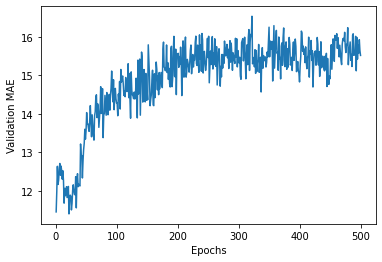

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

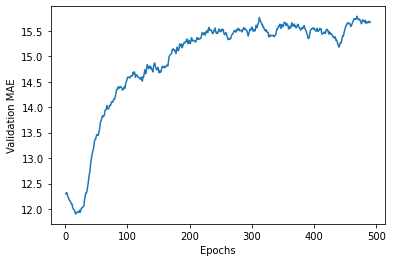

In [24]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [63]:
from keras import models
from keras import layers
def build_model1():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(training_features.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [64]:
model = build_model1()
model.fit(training_features, training_labels, epochs=150, batch_size=20, verbose=1)

Epoch 1/150
26/26 [==============================] - 1s 8ms/step - loss: 1979.3257 - mae: 41.2417
Epoch 2/150
26/26 [==============================] - 0s 4ms/step - loss: 1143.3286 - mae: 29.8041
Epoch 3/150
26/26 [==============================] - 0s 5ms/step - loss: 397.5094 - mae: 16.1593
Epoch 4/150
26/26 [==============================] - 0s 6ms/step - loss: 277.4120 - mae: 13.5259
Epoch 5/150
26/26 [==============================] - 0s 5ms/step - loss: 241.4731 - mae: 13.1156
Epoch 6/150
26/26 [==============================] - 0s 4ms/step - loss: 228.4754 - mae: 12.4737
Epoch 7/150
26/26 [==============================] - 0s 4ms/step - loss: 222.8791 - mae: 12.3342
Epoch 8/150
26/26 [==============================] - 0s 6ms/step - loss: 205.1127 - mae: 11.9063
Epoch 9/150
26/26 [==============================] - 0s 4ms/step - loss: 169.7338 - mae: 10.8029
Epoch 10/150
26/26 [==============================] - ETA: 0s - loss: 178.3056 - mae: 11.03 - 0s 7ms/step - loss: 178.1187 - 

26/26 [==============================] - 0s 4ms/step - loss: 27.8304 - mae: 4.0840
Epoch 86/150
26/26 [==============================] - 0s 2ms/step - loss: 27.7292 - mae: 3.9607
Epoch 87/150
26/26 [==============================] - 0s 2ms/step - loss: 29.6266 - mae: 3.9725
Epoch 88/150
26/26 [==============================] - 0s 3ms/step - loss: 27.4985 - mae: 4.0155
Epoch 89/150
26/26 [==============================] - 0s 5ms/step - loss: 24.6898 - mae: 3.8602
Epoch 90/150
26/26 [==============================] - 0s 6ms/step - loss: 29.5281 - mae: 4.1992
Epoch 91/150
26/26 [==============================] - 0s 5ms/step - loss: 25.8612 - mae: 4.0053
Epoch 92/150
26/26 [==============================] - 0s 4ms/step - loss: 25.1287 - mae: 3.9353
Epoch 93/150
26/26 [==============================] - 0s 3ms/step - loss: 25.1118 - mae: 3.9234
Epoch 94/150
26/26 [==============================] - 0s 3ms/step - loss: 24.1122 - mae: 3.7948
Epoch 95/150
26/26 [==============================] -

In [65]:
test_mse_score, test_mae_score = model.evaluate(testing_features, testing_labels)

10/10 [==============================] - 0s 2ms/step - loss: 96.3451 - mae: 8.0150


In [66]:
y_pred = model.predict(testing_features)

In [67]:
pd.DataFrame(y_pred, testing_labels)

,0
21.969999,33.280293
9.850000,17.323862
15.070000,20.480553
23.250000,37.074955
43.730000,41.896202
...,...
58.779999,58.188576
67.110001,60.904621
20.770000,20.723644
25.180000,26.066547
